# Deep Learning
## TensorFlow API Estimator

In [1]:
#install.packages('tensorflow')
library(tensorflow)

Vamos gerar nosso dataset com 2 variáveis independentes (X e Z):

In [2]:
set.seed(42)
X = seq(from = 1.5, to = 3.0, length.out = 1000)
set.seed(42)
Y <- unlist(lapply(X, function(x) {x^4 + runif(1)*6.5}))
set.seed(42)
Z <- unlist(lapply(X*Y, function(a) {a + runif(1)*3.2}))

In [3]:
library(scatterplot3d)

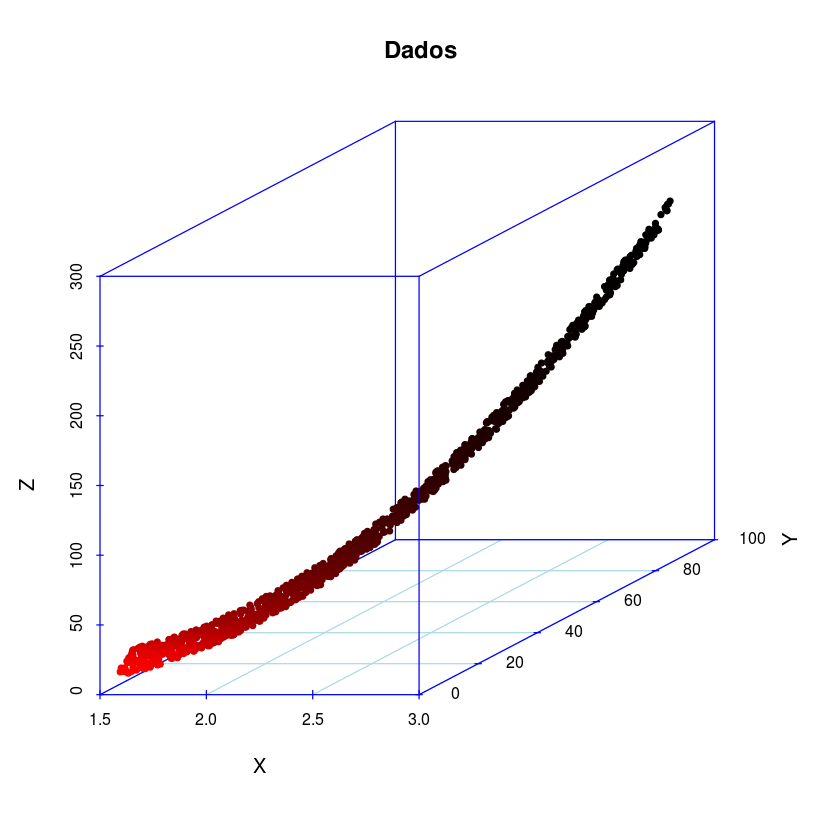

In [4]:
scatterplot3d(X, Y, Z, highlight.3d=TRUE, col.axis="blue",
      col.grid="lightblue", main="Dados", pch=20)

Vamos usar a API "Estimator":

In [5]:
#install.packages('tfestimators', repos='http://cran.us.r-project.org')

In [6]:
library(tfestimators)

Separando dados de treino e teste:

In [7]:
set.seed(42) 
indices_x <- sample.int(n = length(X), size = floor(.75*length(X)), replace = FALSE)
x_treino <- X[indices_x]
x_teste  <- X[-indices_x]
set.seed(42) 
indices_y <- sample.int(n = length(Y), size = floor(.75*length(Y)), replace = FALSE)
y_treino <- Y[indices_y]
y_teste  <- Y[-indices_y]
set.seed(42) 
indices_z <- sample.int(n = length(Z), size = floor(.75*length(Z)), replace = FALSE)
z_treino <- Z[indices_z]
z_teste  <- Z[-indices_z]

In [8]:
df_treino <- data.frame(x = x_treino, y = y_treino, z = z_treino)
y <- df_treino$y
x <- df_treino$x
z <- df_treino$z
head(df_treino)

x,y,z
2.872372,73.02702,212.20062
2.905405,71.36249,207.38894
1.927928,14.92687,29.32511
2.741742,56.58157,155.16851
2.459459,41.23479,103.70212
2.274775,27.78032,63.68815


Vamos criar uma "input function" para nossa rede:

In [9]:
df_input_fn <- input_fn(df_treino,
                 features = c("x","z"), 
                 response = "y",                        
                 batch_size = 2,
                 epochs = 3)

Agora, vamos identificar quais são as variáveis independentes:

In [10]:
f_cols <- feature_columns(
  column_numeric("x"),
  column_numeric("z")
)

Criamos o modelo de regressão:

In [11]:
regressor = dnn_regressor(feature_columns=f_cols, hidden_units=c(64,64,16), label_dimension=1)

E o treinamos com os dados que separamos:

In [12]:
regressor %>%
  train(input_fn = df_input_fn)

Vamos criar uma input function para teste:

In [13]:
df_teste <- data.frame(x = x_teste, y = y_teste, z = z_teste)
y <- df_teste$y
x <- df_teste$x
z <- df_teste$z
head(df_teste)

x,y,z
1.506006,9.315415,16.082657
1.507508,8.538738,14.533319
1.509009,9.973046,17.406498
1.512012,9.497070,16.462060
1.515015,8.243588,13.953934
1.525526,6.179659,9.803187


In [14]:
teste_input_fn <- input_fn(df_teste,
                 features = c("x","z"), 
                 response = "y",                        
                 batch_size = 2,
                 epochs = 1)

In [15]:
regressor %>% evaluate(teste_input_fn)

average_loss,global_step,loss
4.886242,375,9.772485


In [16]:
predic <- regressor %>% predict(teste_input_fn)

In [17]:
head(predic)
length(predic$predictions)

predictions
74.14619
17.06384
16.75681
50.91328
29.17231
21.78918


[1] 250

Vamos plotar um gráfico com as predições:

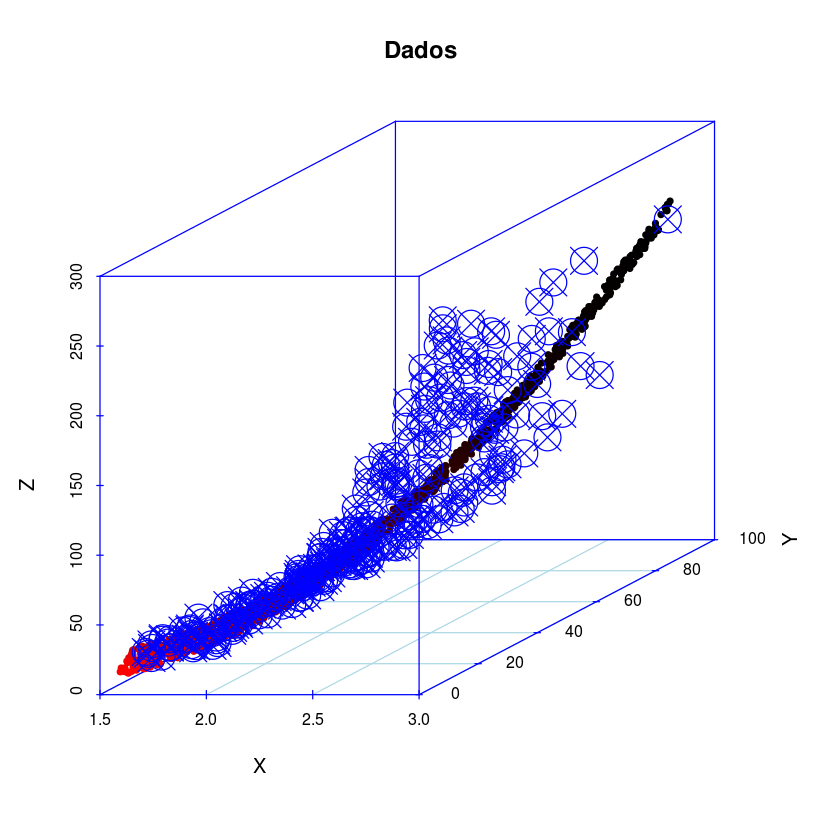

In [18]:
plot1 <- scatterplot3d(X, Y, Z, highlight.3d=TRUE, col.axis="blue",
      col.grid="lightblue", main="Dados", pch=20)
plot1$points3d(df_teste$x, predic$predictions, df_teste$z, col = 4, pch=13, cex=3)